# 第11周作业 



#### 题 1：编制程序实现以下功能（自动给小学生出加法减法题）
- 100以内的两个数的加减法
- 总共出60道题
- 每行出题三道(共20行）
- 如：
    `32+64=______     93-27=______     55-17=_______`
- 输出到文件 question.txt中
- 注意不能出现小数减大数，加起来不能超过100

In [36]:
# 题 1 
# 代码完成如下
import random

def test(count):
    count_temp = 0  
    question=[]
    while True:
        
        i = random.randrange(0,100)  
        j = random.randrange(0,100)
        flag_addsub = random.randint(0, 1)
        i1=str(i)
        j1=str(j)
        if flag_addsub:
            str_temp = i1.center(2) + ' + ' + j1.center(2)+ ' = '  +'______'
            if i+j<100:
                question.append(str_temp)
                count_temp+=1
            
        else:
            str_temp = i1.center(2) + ' - '+  j1.center(2)+ ' = ' +'______'
            if i-j>0:
            
                question.append(str_temp)
                count_temp+=1
        if count_temp >= count:
            break

    return question
question=test(60)
print(question)
with open('question.txt','a')as f:
    for i in range(60):
        f.write(question[i]+'        ')
        if (i+1)%3==0:
            f.write('\n')



['68 + 10 = ______', '73 - 68 = ______', '48 - 19 = ______', '39 - 32 = ______', '51 - 43 = ______', '30 + 19 = ______', '80 + 19 = ______', '56 + 41 = ______', '22 + 76 = ______', '90 - 22 = ______', '96 - 66 = ______', '87 - 36 = ______', '64 - 47 = ______', '17 + 1  = ______', '67 + 6  = ______', '55 - 47 = ______', '54 + 3  = ______', '61 - 23 = ______', '82 - 0  = ______', '81 - 16 = ______', '39 + 26 = ______', '51 - 2  = ______', '76 - 66 = ______', '86 - 60 = ______', '84 - 25 = ______', '79 - 34 = ______', '32 + 3  = ______', '48 + 20 = ______', '25 + 6  = ______', '25 + 7  = ______', '43 + 34 = ______', '28 + 49 = ______', '22 + 7  = ______', '86 - 67 = ______', '54 - 48 = ______', '67 + 24 = ______', '45 + 4  = ______', '5  - 0  = ______', '14 + 1  = ______', '47 + 22 = ______', '4  + 33 = ______', '90 + 1  = ______', '4  + 67 = ______', '25 + 29 = ______', '24 - 12 = ______', '2  + 88 = ______', '26 + 53 = ______', '65 + 30 = ______', '4  + 63 = ______', '34 - 32 = ______',

#### 题 1（附加）：请将上述结果输出到word文件中
- 使用python-docx模块


In [42]:
# 题 1 附加代码写于此
import docx
file=open('question.txt') 
doc = docx.Document()
for i in file.readlines():
    doc.add_paragraph(i)


doc.save('question.docx')


#### 题 2：——  散点找中线
- 随机生成n个点
- 从n个点中，随机过某一点，生成一条直线，使得：
  - 该线将已知点分成2个区，两个区的点数相同
  - 当n为奇数时，两边点数一样
  - 当n为偶数时，可以一边比另一边多一个点
- 文件输出到lsp文件，可以在CAD中检查结果是否正确

In [1]:
# 题 2

import random
import itertools
n = random.randint(3,20)
dot=[]
for i in range(int(n)):
    dot.append((random.randint(1, 100), random.randint(1, 100)))
def Line(x, y):
    p1x=x[0]
    p1y=x[1]
    p2x=y[0]
    p2y=y[1]
    sign = 1
    a = p2y - p1y
    if a < 0:
        sign = -1
        a = sign * a
    b = sign * (p1x - p2x)
    c = sign * (p1y * p2x - p1x * p2y)
    return [a, b, c]

line1=[]
line2=[]
filelsp=open('散点中线图.lsp','a')
for i in dot:
    filelsp.write(f"""(command"donut" 0 1 '({i[0]} {i[1]} 0) "")\n""")
    

for j in range(1,len(dot)):
    a,b,c=Line(dot[0],dot[j])
    count1=0
    count2=0
    for each in dot:
        if each[0]*a+each[1]*b+c>0:
            count1+=1
        elif each[0]*a+each[1]*b+c<0:
            count2+=1
    if n%2==1 and abs(count2-count1)==1:
        line1.append(dot[0])
        line2.append(dot[j])
    elif n%2==0 and count2==count1:
        line1.append(dot[0])
        line2.append(dot[j])
    else:
        continue
for i in line2[:]:
    if line2.count(i)>1:
        line2.remove(i)
print(dot)
print('------------------------')
print(line2)
if len(line2)==1:
    filelsp.write(f"""(command"line" '({line1[0][0]} {line1[0][1]} 0)'({(line2[0][0]+0.5)} {(line2[0][1]+0.5)} 0)"")\n""")
elif len(line2)==2:
    filelsp.write(f"""(command"line" '({line1[0][0]} {line1[0][1]} 0)'({(line2[0][0]+line2[1][0])/2} {(line2[0][1]+line2[1][1])/2} 0)"")\n""")            
filelsp.close()  




[(75, 15), (76, 19), (21, 16), (8, 76), (74, 90), (75, 58), (95, 42), (82, 60), (43, 73), (48, 56), (26, 54), (99, 93)]
------------------------
[(74, 90)]


#### 题 3 散点求包络线
- 已知若干散点（点数大于3）
- 尝试找出一条包络线
- 该包络线经过这些散点
- 所有的点被该包络线包围住
- 文件输出到lsp文件，并可以在CAD中检查
- 该包络线是一个凸多边形（即所有点都在该凸多边形的一侧（在线上也可以））


In [8]:
# 题 3
import random
import itertools
n = 20
dot=[]
for i in range(n):
    dot.append((random.randint(1, 100), random.randint(1, 100)))

def Line(x, y):
    p1x=x[0]
    p1y=x[1]
    p2x=y[0]
    p2y=y[1]
    sign = 1
    a = p2y - p1y
    if a < 0:
        sign = -1
        a = sign * a
    b = sign * (p1x - p2x)
    c = sign * (p1y * p2x - p1x * p2y)
    return [a, b, c]
print(dot)
filelsp=open('散点包络图.lsp','a')
for i in dot:
    filelsp.write(f"""(command"donut" 0 1 '({i[0]} {i[1]} 0) "")\n""")
    
for i in dot:
    for j in dot:
        a,b,c=Line(i,j)
        count1=0
        count2=0
        for each in dot:
            if each[0]*a+each[1]*b+c>0:
                count1+=1
            elif each[0]*a+each[1]*b+c<0:
                count2+=1
        if count1==18 or count2==18:
            filelsp.write(f"""(command"line" '({i[0]} {i[1]} 0)'({j[0]} {j[1]} 0)"")\n""")
        else:
            continue
            
            
filelsp.close()           



[(95, 29), (84, 78), (20, 42), (63, 54), (87, 27), (88, 16), (61, 51), (33, 15), (86, 63), (81, 80), (38, 87), (14, 3), (59, 24), (92, 27), (16, 55), (66, 34), (73, 90), (4, 79), (96, 53), (66, 86)]


In [80]:
filelsp=open('线1图.lsp','a')
for i in dot:
    filelsp.write(f"""(command "donut" 0 2 '({i[0]} {i[1]} 0) "")\n""")
filelsp.close()

In [81]:
filelsp=open('线2图.lsp','a')
a=[(3, 3), (9, 6), (6, 8), (3, 10), (9, 1), (1, 7), (10, 6), (10, 7), (1, 1), (9, 9), (7, 7), (9, 2), (1, 2), (6, 3), (1, 4), (2, 2), (4, 6), (6, 6), (3, 7), (5, 6)]

for i in a:
    filelsp.write(f"""(command "donut" 0 2 '({i[0]} {i[1]} 0) "")\n""")
filelsp.close()

#### 题 4 求下列结构的位移曲线
- 学号为奇数的做左边题目；学号为偶数的做右边题目
<img src="week11.png">

- (a) 其中L1=3m,L2=3m,L3=2m;q=2kN/m  Fp=1kN
- (b) L1=6m,L2=1m,L3=2m,L4=2m;q=2kN/m,Fp=6kN
- 尽量将结果用matplotlib模块绘制出来
- 或者用lsp语言输出到CAD
- 完成函数

In [58]:
# a组
L1, L2, L3 = 3,3,2
L = [L1, L2, L3]
q,Fp=2,1


In [59]:
def deflection(L,q,Fp)->(list, list):
    ## 提示输出两列数据
    #  第一个列表为梁长方向的位置（左边起点为0）
    #  第二个列表为不同点的挠度
    xloc, disp = [],[] #list(range(1,10)), list(range(2,11))
    x=0
    while True:
        if x>(L1+L2+L3):
            break
        if x<=(L1+L2):
            y=y=1/2*q*x**2-5*x
        elif (L1+L2)<x<=(L1+L2+L3):
            y=1/2*q*(L1+L2+L3-x)**2+Fp*(L1+L2+L3-x)
  
        xloc.append(x)
        disp.append(y) 
        x+=0.01
    ## 代码完成在这里

    
    return xloc, disp

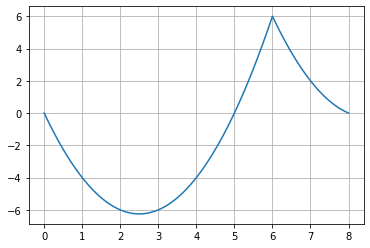

In [60]:
import  matplotlib.pyplot as plt
xloc, disp = deflection(L,q,Fp)
plt.figure()
plt.plot(xloc, disp)
plt.grid()
plt.show()

#### 题 5(附加）网页抓取
- 尝试抓取下列网页的人员信息：
- https://civileng.tongji.edu.cn/18338/list.htm
- 输出相应的信息-尽量整齐划一输出

In [15]:
import requests
from bs4 import BeautifulSoup
import time
import random
url = 'https://civileng.tongji.edu.cn/18338/list.htm'
r = requests.get(url)
r.encoding = r.apparent_encoding
soup = BeautifulSoup(r.text, "html.parser")
soup
# 题 4 代码







<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>教授（研究员）</title>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="IE=EmulateIE7" http-equiv="X-UA-Compatible">
<meta content="同济土木学院, 土木学院, 土木工程" name="keywords">
<meta content="同济土木学院, 土木学院, 土木工程" name="description"/>
<link href="/_css/_system/system.css" rel="stylesheet" type="text/css"/>
<link href="/_upload/site/1/style/84/84.css" rel="stylesheet" type="text/css"/>
<link href="/_upload/site/01/54/340/style/319/319.css" rel="stylesheet" type="text/css"/>
<link href="/_css/tpl2/system.css" rel="stylesheet" type="text/css"/>
<link href="/_js/_portletPlugs/sudyNavi/css/sudyNav.css" rel="stylesheet" type="text/css">
<link href="/_js/_portletPlugs/datepicker/css/datepicker.css" rel="stylesheet" type="text/css"/>
<link href="/_js/_portletPlugs/simpleNews/css/simplenews.css" rel="stylesheet" type="text/css"/>
<link href="/_css/tpl2/default/default.css" rel="stylesheet" type="text/css"/>
<script jque

## 结束